In [1]:
# Import dependencies for project
import pandas as pd
import scipy.stats as stats
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create pathway to import CSV file
# Local source to enhance interoperator capabilities
LC_data = Path("resources/cancer patient data sets.csv")


In [3]:
# Create pandas dataframe and visualize data
working_df = pd.read_csv(LC_data, index_col="index")
working_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


In [4]:
#(step added later in project)
# Re-define gender labels in dataframe so line graphs will use name as opposed to numbers
working_df["Gender"] = working_df["Gender"].map({1:"Male", 2:"Female"})

In [5]:
#visualize age distribution in dataset
#Create easy to understand bins of "age groups"
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_groups = ["<20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
working_df["age_groups"] = pd.cut(working_df["Age"], bins, labels=age_groups, include_lowest=True)
working_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,age_groups
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,Male,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,Low,30-39
1,P10,17,Male,3,1,5,3,4,2,2,...,3,7,8,6,2,1,7,2,Medium,<20
2,P100,35,Male,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,30-39
3,P1000,37,Male,7,7,7,7,6,7,7,...,2,3,1,4,5,6,7,5,High,30-39
4,P101,46,Male,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,High,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,6,7,...,3,2,7,8,2,4,5,3,High,40-49
996,P996,37,Female,6,8,7,7,7,6,7,...,6,5,7,2,4,3,1,4,High,30-39
997,P997,25,Female,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,20-29


In [6]:
#understand central tendency characteristics of data
working_df["Age"].mean()

37.174

In [7]:
#Understand central tendency and presence of skew
working_df["Age"].median()

36.0

In [8]:
#List column names to for later graphing loops.
working_df.columns


Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level', 'age_groups'],
      dtype='object')

In [9]:
#separate groups as for ANOVA test to understand distribution
group_1 = working_df[working_df["age_groups"] == "<20"]["Smoking"]
group_2 = working_df[working_df["age_groups"] == "20-29"]["Smoking"]
group_3 = working_df[working_df["age_groups"] == "30-39"]["Smoking"]
group_4 = working_df[working_df["age_groups"] == "40-49"]["Smoking"]
group_5 = working_df[working_df["age_groups"] == "50-59"]["Smoking"]
group_6 = working_df[working_df["age_groups"] == "60-69"]["Smoking"]
group_7 = working_df[working_df["age_groups"] == "70-79"]["Smoking"]

#perform ANOVA test
stats.f_oneway(*[group_1, group_2, group_3, group_4, group_5, group_6, group_7])

F_onewayResult(statistic=5.287856666765348, pvalue=2.2278773919852787e-05)

In [10]:
# figure out a way to run same ANOVA using a "for loop" to make coding less tedious 
age_group_smoking = []
for group in working_df["age_groups"].unique():
    group_smoking = working_df[working_df["age_groups"] == group]["Smoking"]
    age_group_smoking.append(group_smoking)

age_group_smoking
stats.f_oneway(*age_group_smoking)

F_onewayResult(statistic=5.2878566667653475, pvalue=2.2278773919852787e-05)

In [12]:
#(step added after analyses were already done)
# working on an alternate way to graph findings using an imbedded loop
# Modify dataframe to produce summary mean values in this step

Strat_df = working_df.groupby(["age_groups"])[['Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']].mean()
Strat_df

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
age_groups,,,,,,,,,,,,,,,,,,,,,
<20,3.417910,3.820896,4.582090,4.537313,4.567164,3.552239,3.970149,3.955224,3.970149,4.134328,...,4.388060,3.582090,3.477612,4.074627,3.955224,3.701493,3.686567,2.731343,3.029851,2.985075
20-29,4.025641,4.188034,5.051282,4.585470,4.256410,4.128205,4.606838,4.205128,3.764957,3.871795,...,4.504274,3.008547,3.427350,4.222222,4.034188,3.414530,4.004274,3.294872,4.021368,2.598291
30-39,3.824022,4.840782,5.564246,5.064246,4.770950,4.608939,4.698324,4.877095,4.000000,4.592179,...,5.310056,4.377095,4.030726,4.268156,3.717877,4.100559,3.818436,4.013966,3.910615,3.167598
40-49,3.478261,4.333333,4.971014,4.835749,4.531401,4.299517,4.420290,4.507246,3.772947,4.333333,...,4.874396,4.120773,4.062802,4.193237,3.961353,4.560386,3.719807,3.628019,3.888889,2.922705
50-59,3.714286,4.111111,4.095238,4.158730,4.063492,4.587302,3.698413,3.396825,3.809524,2.920635,...,4.047619,3.603175,3.873016,4.095238,2.936508,2.603175,4.285714,3.380952,4.555556,3.222222
60-69,4.852459,6.196721,5.524590,5.524590,5.180328,4.868852,4.213115,4.475410,4.393443,3.885246,...,4.852459,3.688525,4.295082,4.344262,3.475410,1.852459,5.114754,2.803279,2.573770,2.557377
70-79,5.000000,6.000000,6.000000,5.000000,6.000000,5.000000,6.000000,5.000000,8.000000,5.000000,...,5.000000,4.000000,3.000000,6.000000,2.000000,1.000000,2.000000,1.000000,6.000000,2.000000
80+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


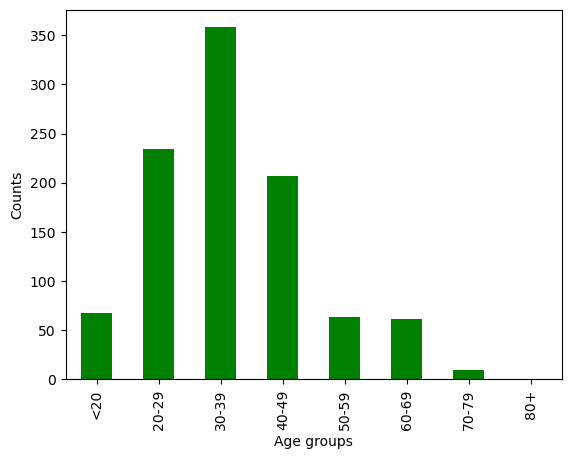

In [13]:
# First pass at using binned data to understand age distribution
counts = working_df["age_groups"].value_counts().sort_index()
counts.plot(kind='bar', color='green')
plt.xlabel("Age groups")
plt.ylabel("Counts")
plt.show()

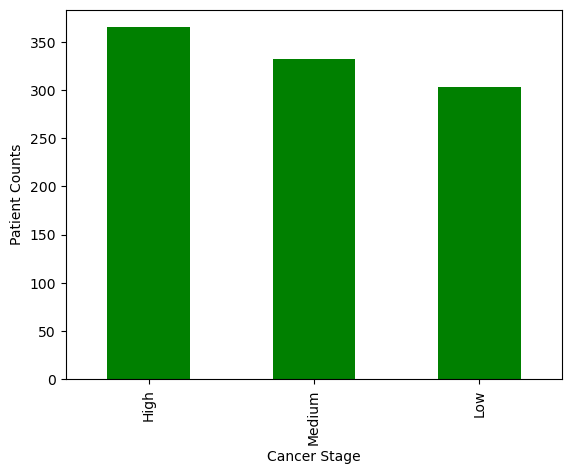

In [14]:
#First pass to understand distribution of "Cancer Level" AKA Stage
Level_counts = working_df["Level"].value_counts()
Level_counts.plot (kind = "bar", color = "g")
plt.xlabel("Cancer Stage")
plt.ylabel("Patient Counts")
plt.show()

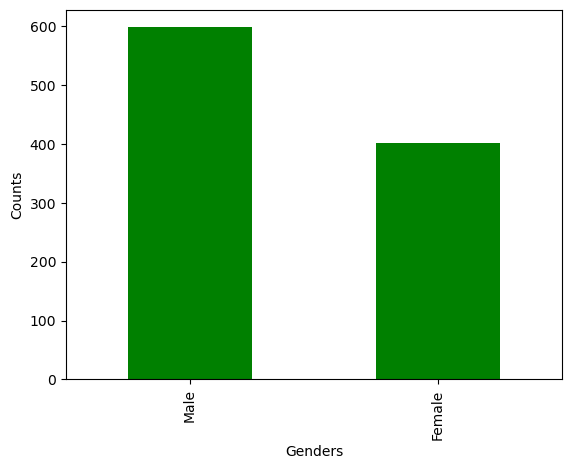

In [15]:
# Gender distribution in the data (after relabeling of gender labels in dataframe)
# Use single letter color designation
gender_counts = working_df["Gender"].value_counts()
gender_counts.plot(kind='bar', color="g")
plt.xlabel("Genders")
plt.ylabel("Counts")
plt.show()

In [16]:
#Understanding risk factor distribution after dichotomizing age 
# Add new varaible to dataframe around median observed age
bins2 = [0, 36, 100]
Age_groups2 = ["<36" , "= or >36"]
working_df1 = working_df
working_df1["age_groups2"] = pd.cut(working_df["Age"], bins2, labels=Age_groups2, include_lowest=True)
working_df1

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,age_groups,age_groups2
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,Male,2,4,5,4,3,2,2,...,2,2,3,1,2,3,4,Low,30-39,<36
1,P10,17,Male,3,1,5,3,4,2,2,...,7,8,6,2,1,7,2,Medium,<20,<36
2,P100,35,Male,4,5,6,5,5,4,6,...,9,2,1,4,6,7,2,High,30-39,<36
3,P1000,37,Male,7,7,7,7,6,7,7,...,3,1,4,5,6,7,5,High,30-39,= or >36
4,P101,46,Male,6,8,7,7,7,6,7,...,4,1,4,2,4,2,3,High,40-49,= or >36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,6,7,...,2,7,8,2,4,5,3,High,40-49,= or >36
996,P996,37,Female,6,8,7,7,7,6,7,...,5,7,2,4,3,1,4,High,30-39,= or >36
997,P997,25,Female,4,5,6,5,5,4,6,...,9,2,1,4,6,7,2,High,20-29,<36


In [17]:
# Understand mean risk factor values in data dichotomized by median age
Strat_df1 = working_df1.groupby(["age_groups2"])[['Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']].mean()
Strat_df1

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
age_groups2,,,,,,,,,,,,,,,,,,,,,
<36,3.642857,4.388031,5.191120,4.793436,4.567568,4.249035,4.571429,4.457529,3.720077,4.084942,...,4.768340,3.725869,3.851351,4.465251,3.990347,3.644788,3.978764,3.461390,3.990347,2.855212
= or >36,4.051867,4.751037,5.136929,4.890041,4.593361,4.520747,4.404564,4.473029,4.192946,4.313278,...,4.956432,3.995851,3.858921,3.997925,3.547718,3.854772,3.863071,3.616183,3.705394,3.002075


<Axes: xlabel='age_groups'>

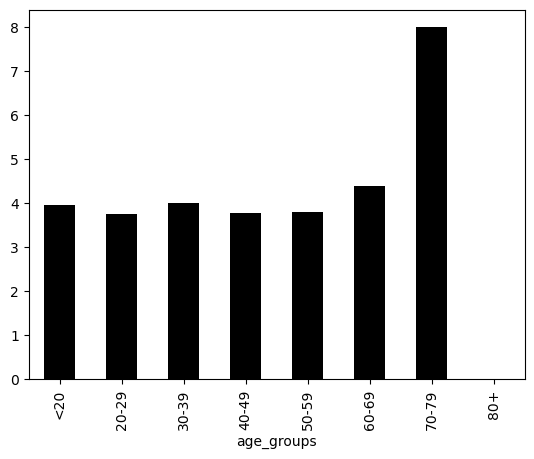

In [13]:
#Evaluate differences in smoking within age groups
#Analysis based on a priori thoughts about relationship
mean_values = working_df.groupby("age_groups")["Smoking"].mean()
mean_values.plot(kind='bar', color = "black")


# plt.bar(mean_values.ind, mean_values)

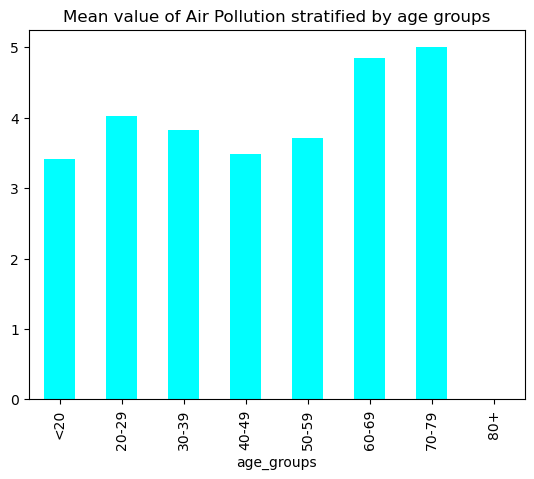

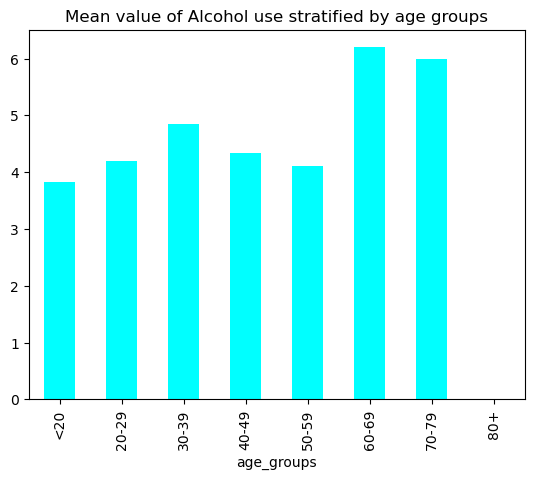

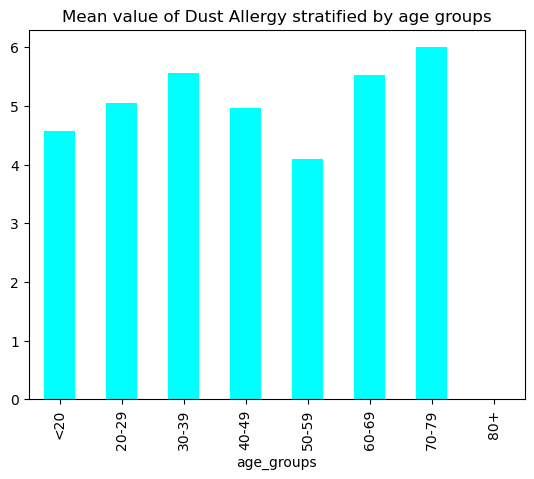

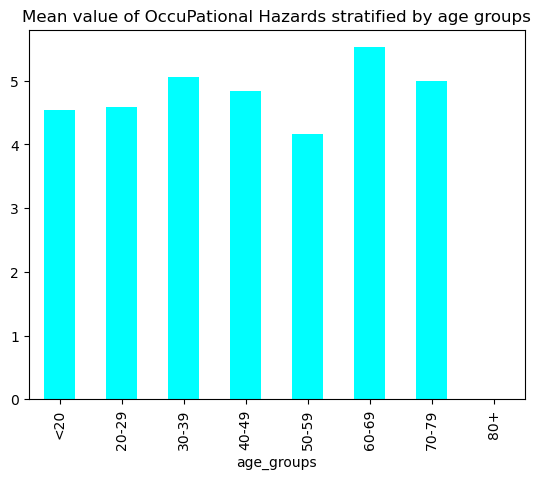

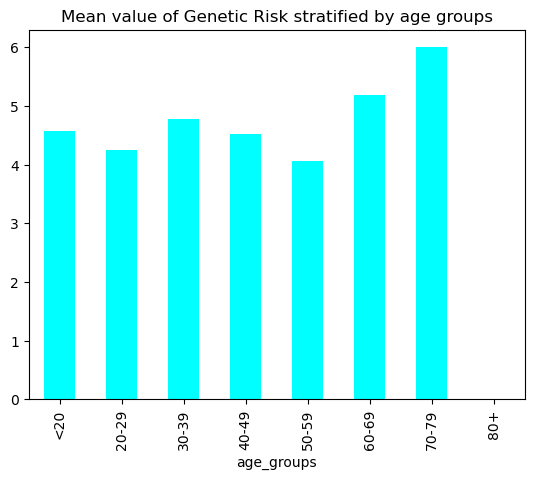

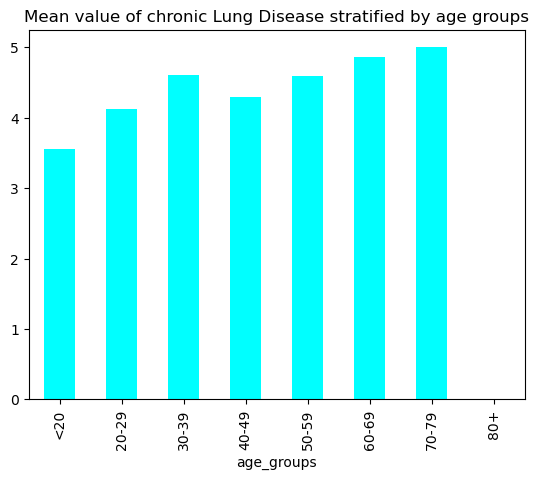

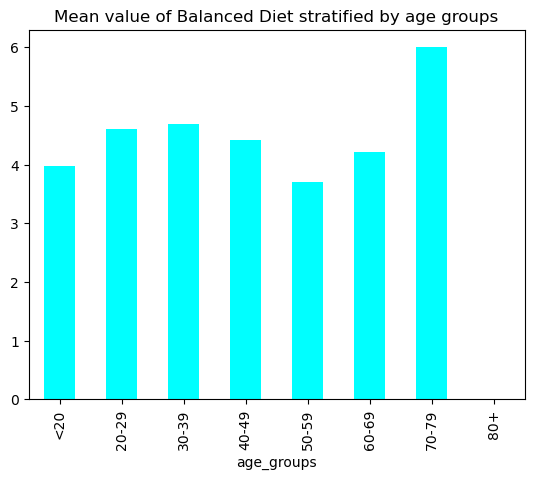

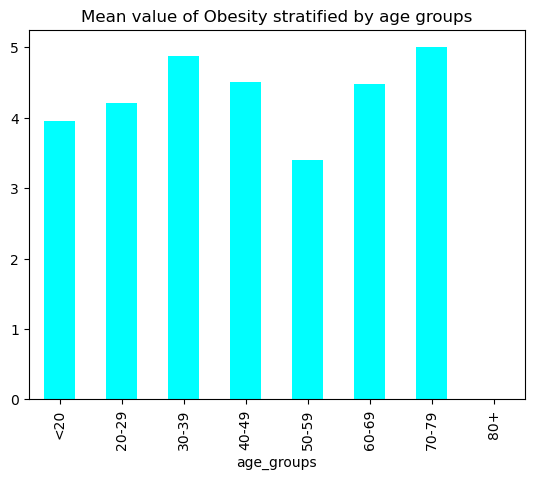

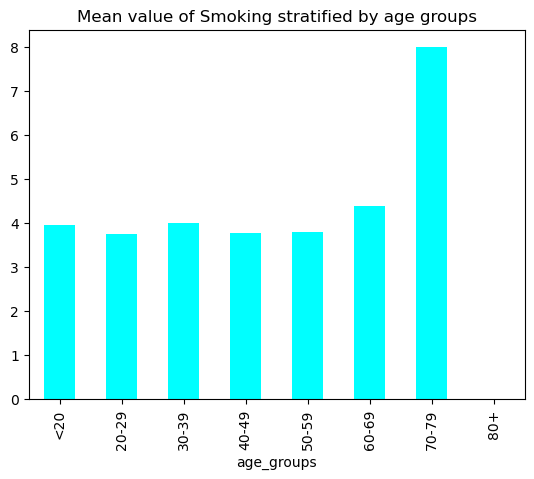

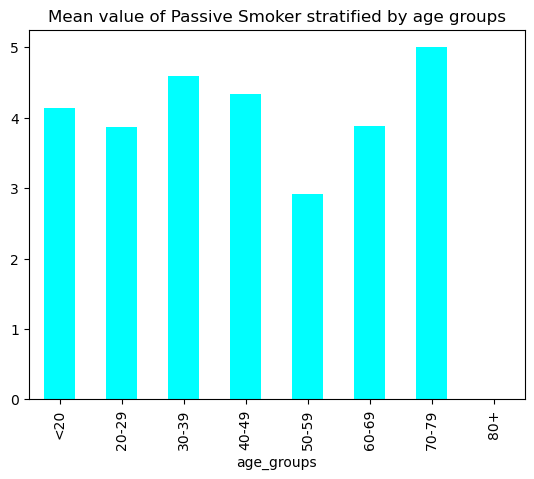

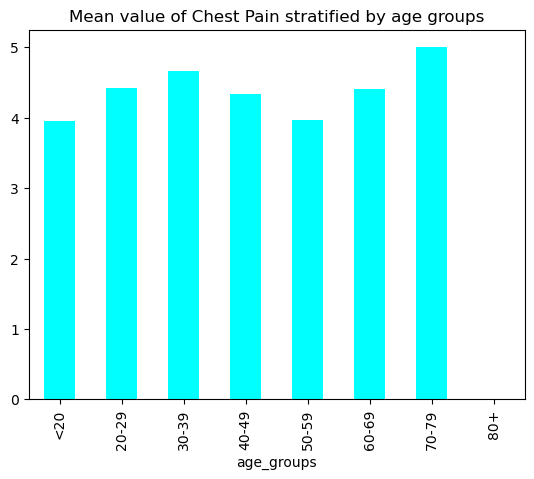

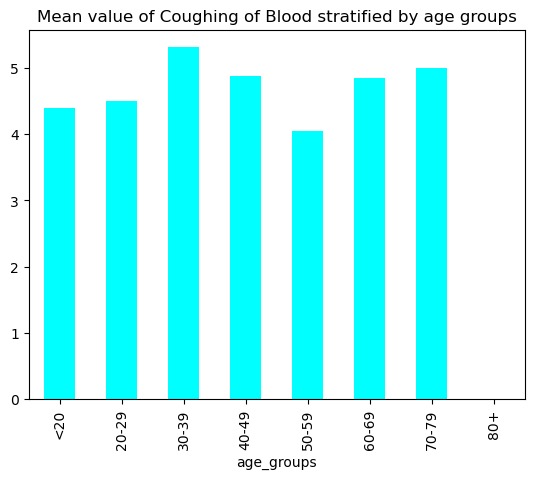

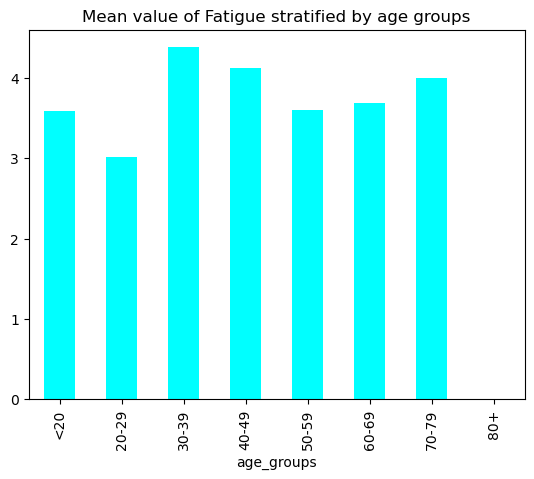

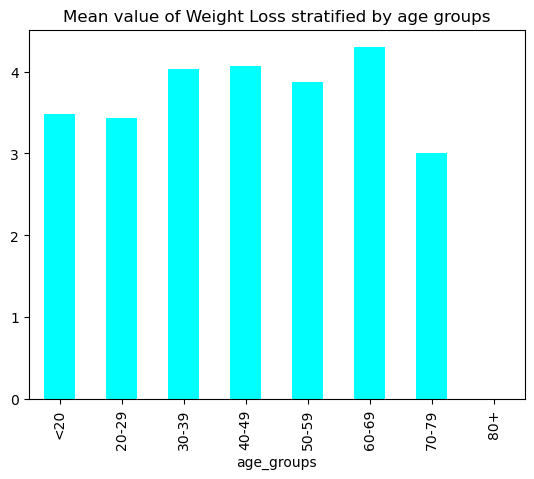

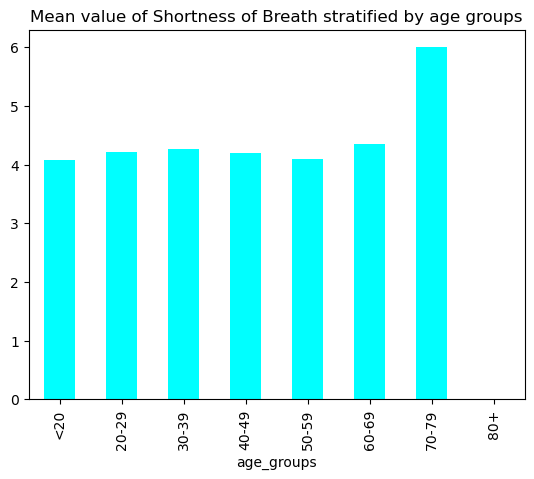

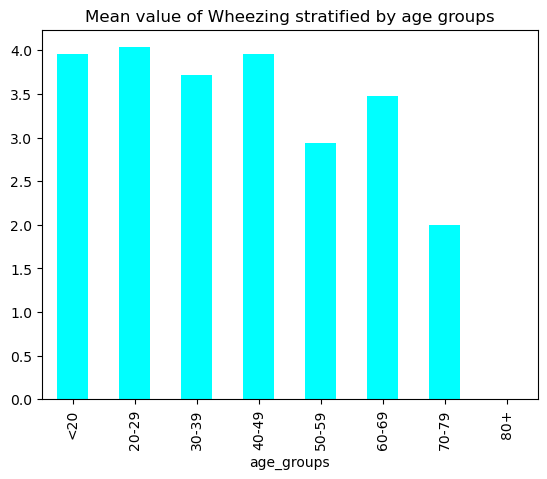

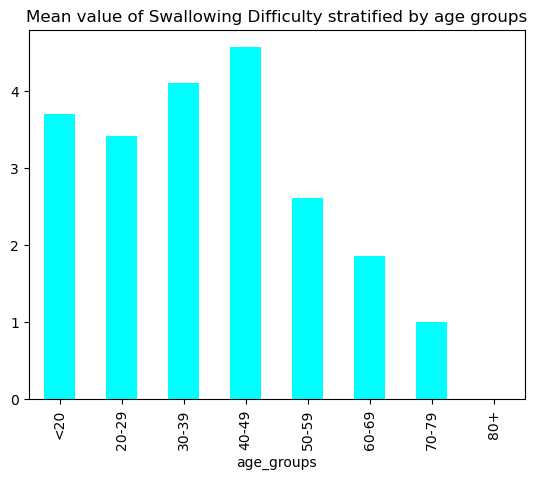

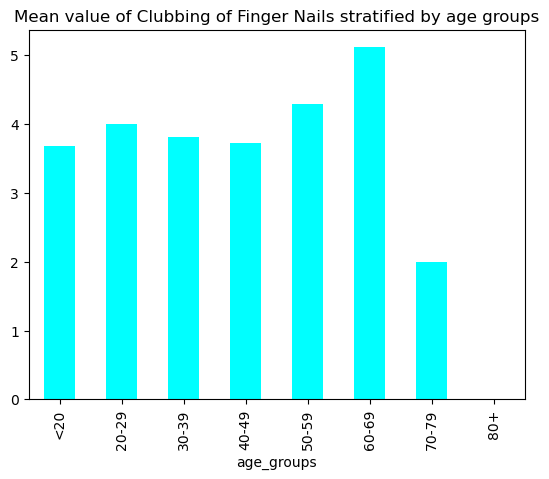

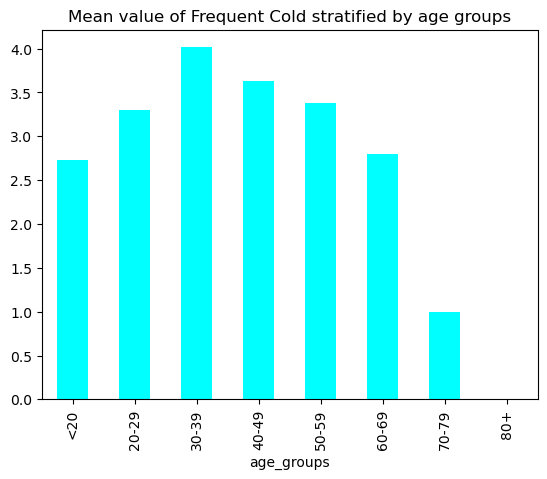

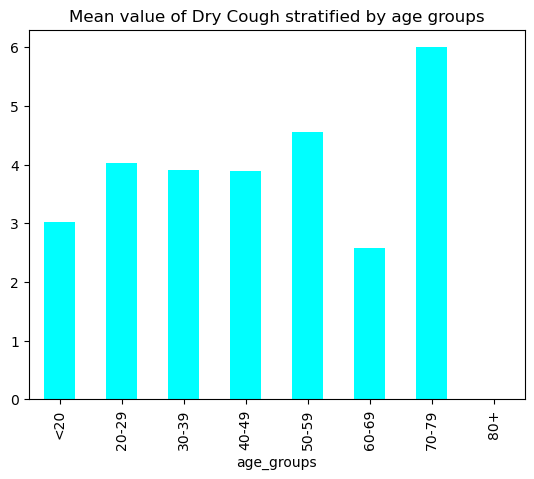

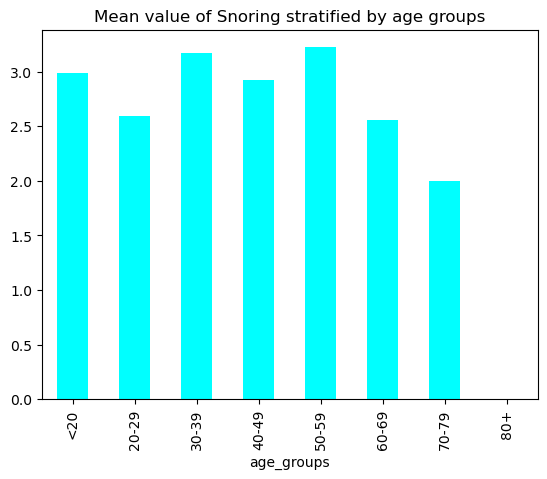

In [20]:
#Analyze age distribution of risk factors using loop
#Experiment with different graph color

for risk_factor in Strat_df.columns:
    Strat_df[risk_factor].plot(kind= "bar", color = "cyan")
    plt.title(f'Mean value of {risk_factor} stratified by age groups')
    plt.show()

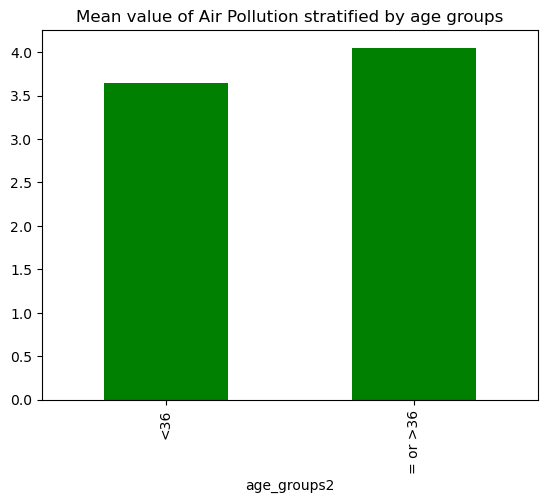

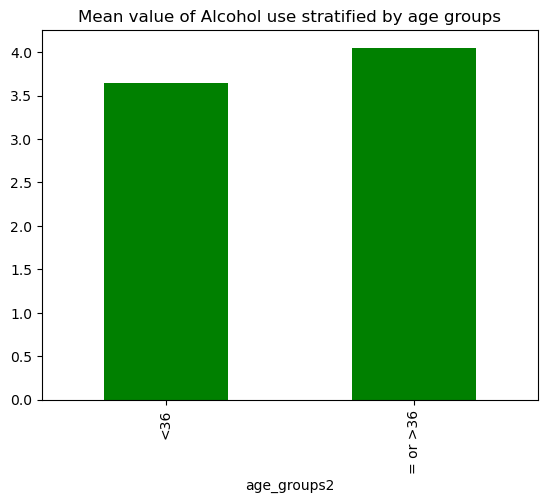

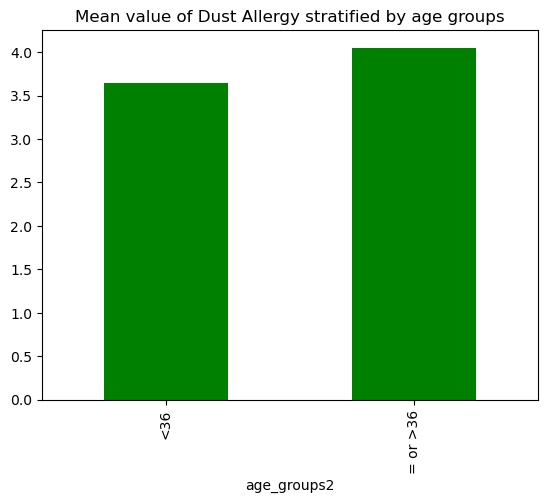

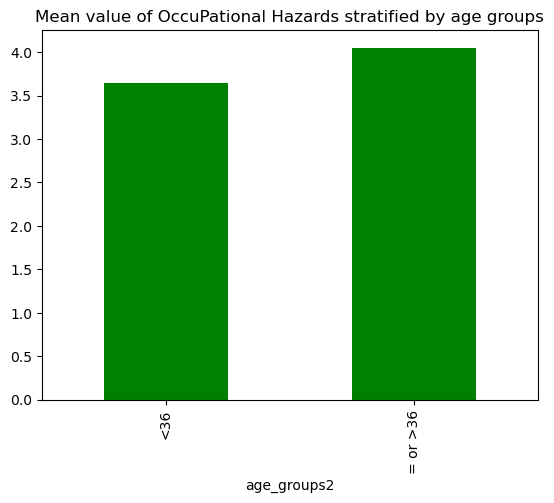

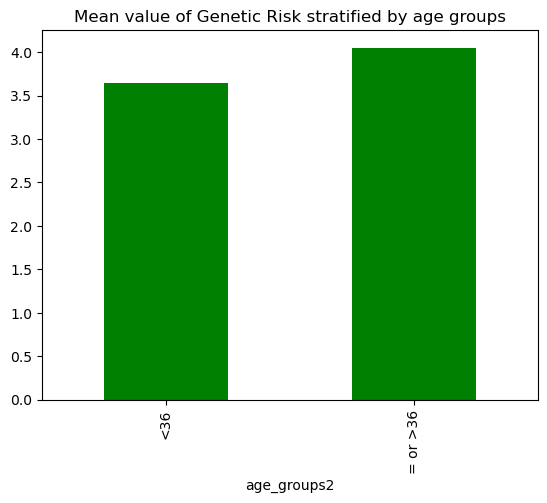

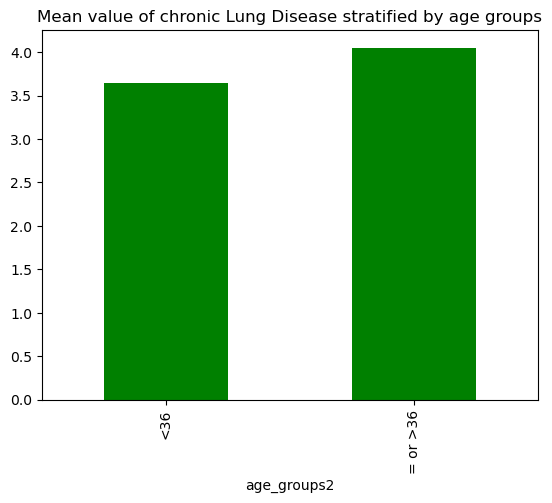

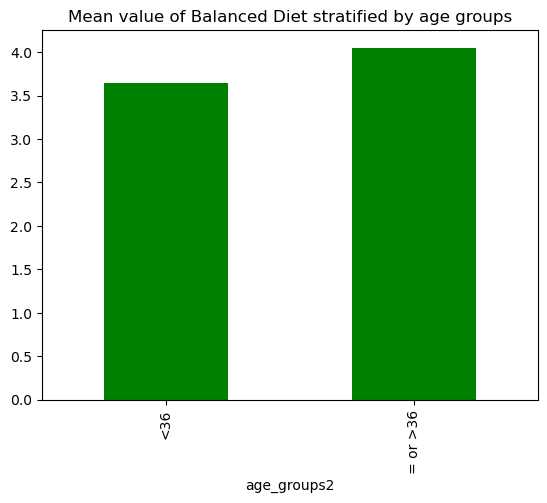

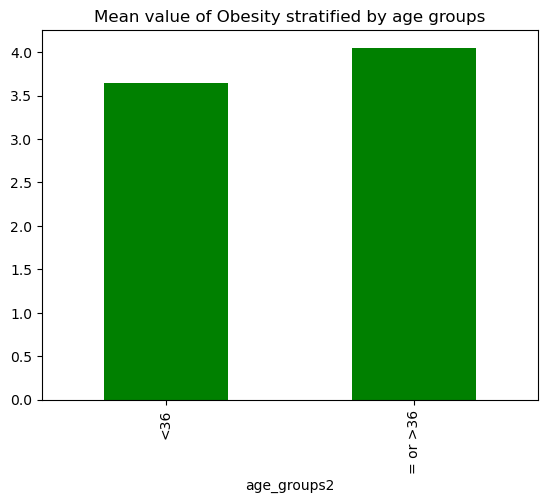

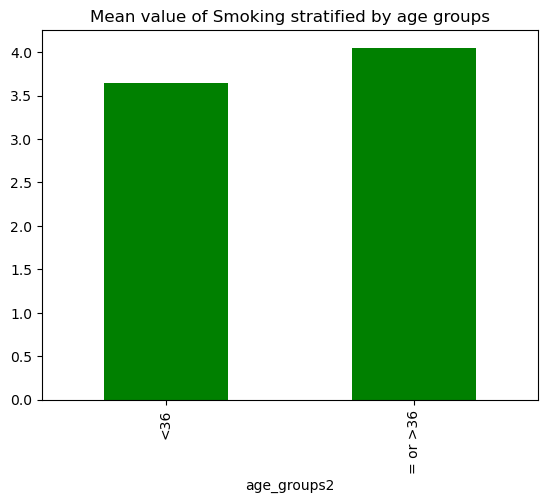

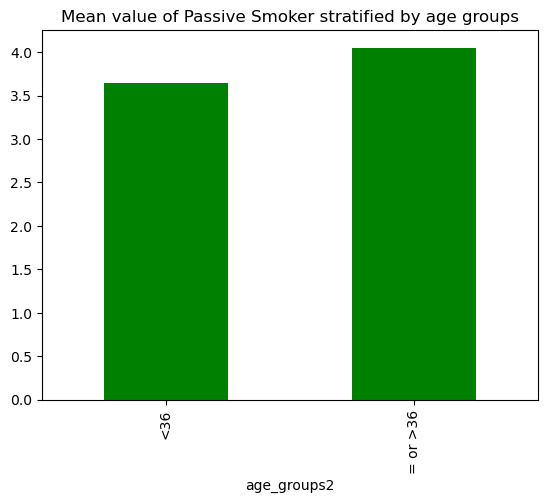

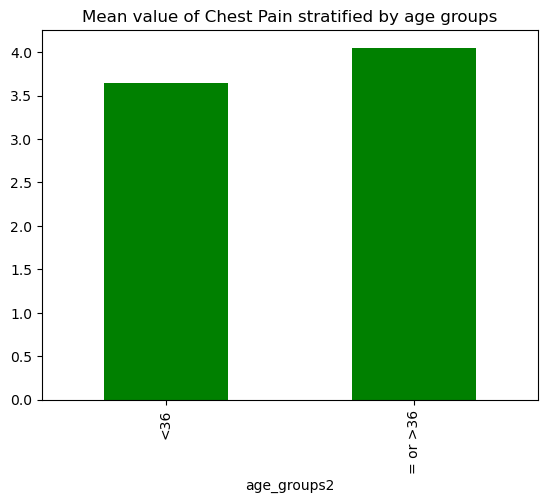

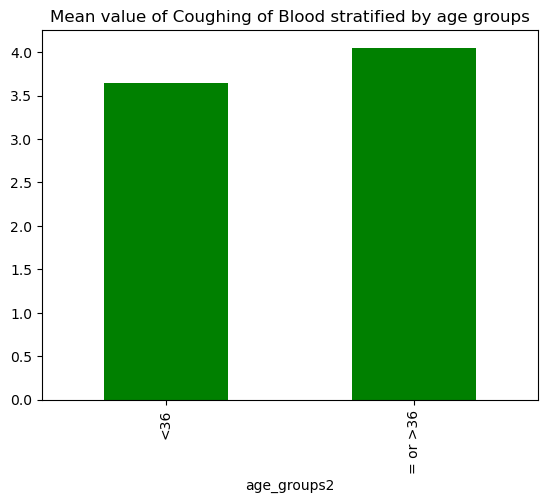

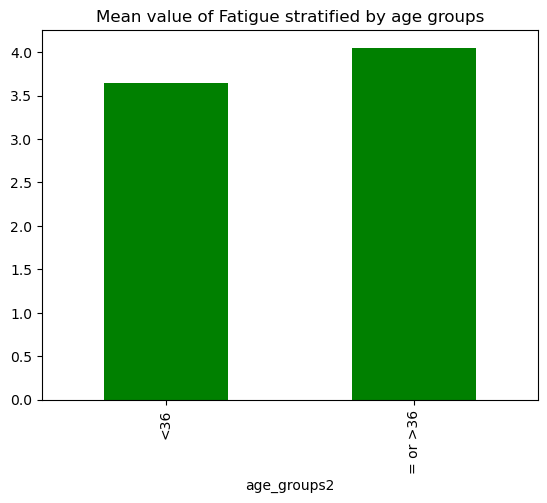

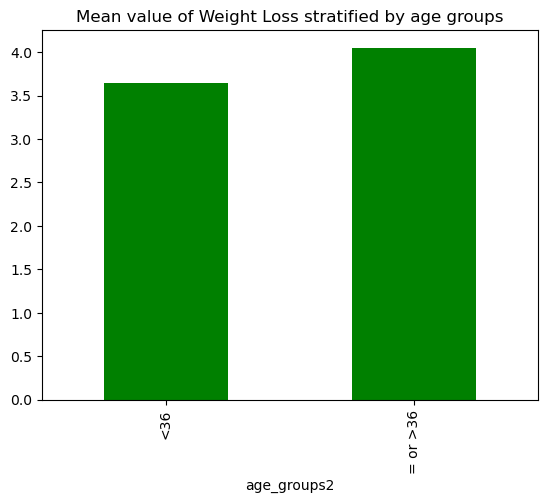

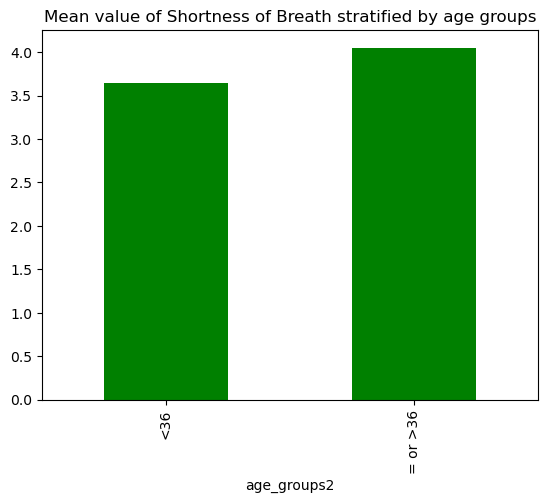

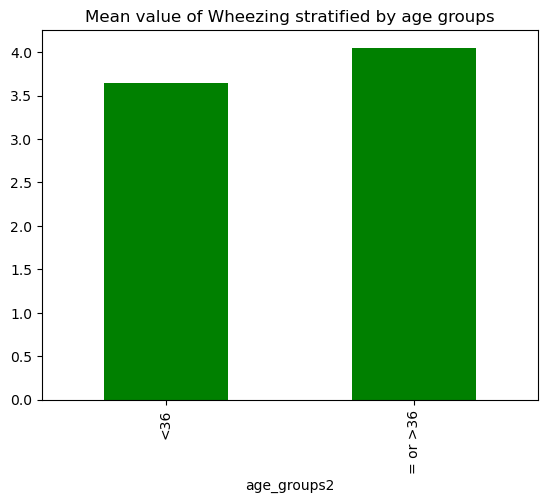

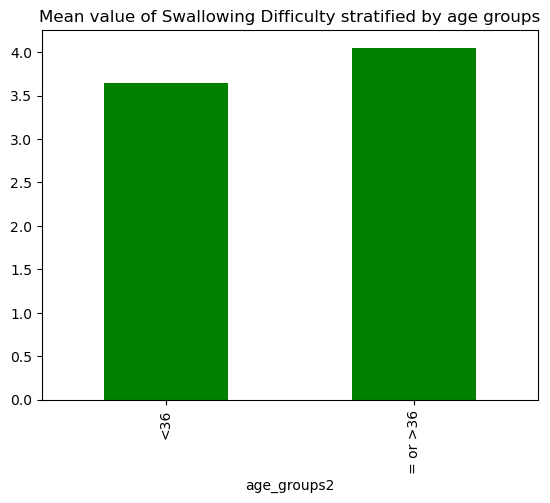

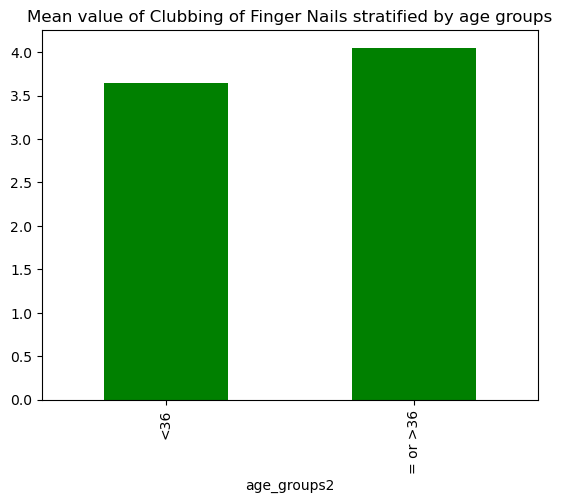

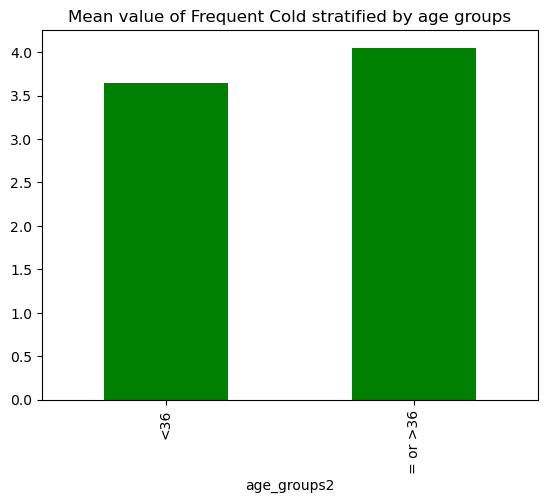

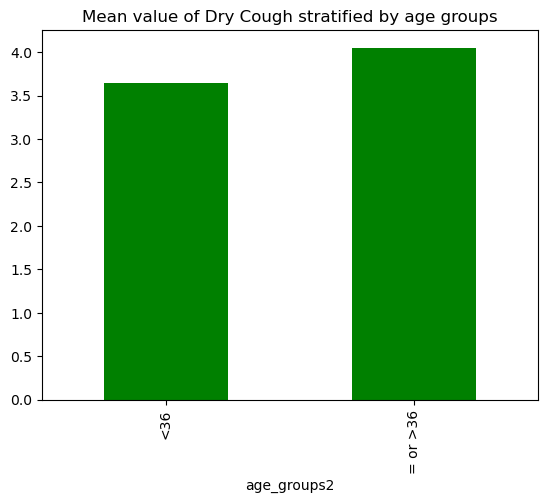

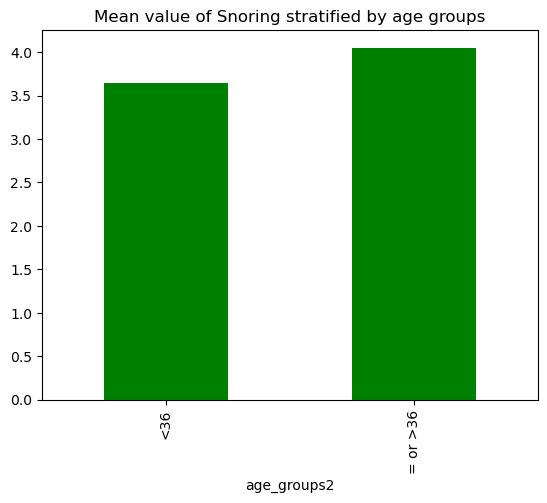

In [21]:
# Understand risk factor distribution with less granular (dichotomized) age
for risk_factor in Strat_df1.columns:
    Strat_df1[i].plot(kind= "bar", color = "g")
    plt.title(f'Mean value of {risk_factor} stratified by age groups')
    plt.show()

In [22]:
#Consider number of predictor varaibles included by team vs. total variables
predictor_cols = ['Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']
print(len(predictor_cols))
print(len(working_df.columns))

21
27


In [23]:
#Understand gender distribution of variables
Strat_df2 = working_df.groupby(["Gender"]).mean()
Strat_df2

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Gender,,,,,,,,,,,,,,,,,,,,,
Female,34.216418,3.228856,3.835821,4.671642,4.345771,4.002488,3.917910,4.231343,4.144279,3.318408,...,4.425373,3.537313,3.699005,4.111940,3.587065,3.584577,3.823383,3.534826,3.547264,2.599502
Male,39.162207,4.250836,5.051839,5.496656,5.172241,4.968227,4.690635,4.665552,4.680602,4.371237,...,5.150502,4.070234,3.959866,4.326087,3.904682,3.854515,3.989967,3.536789,4.058528,3.145485


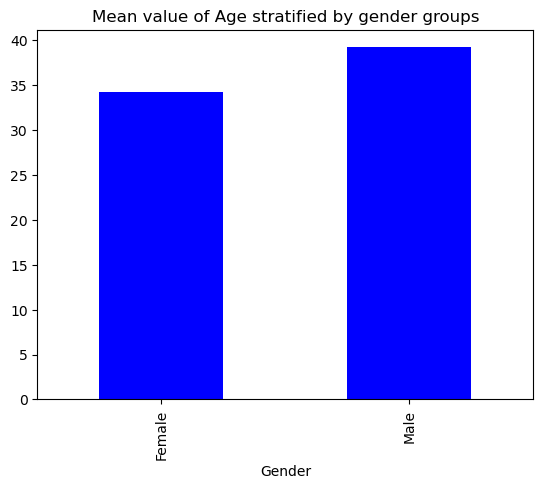

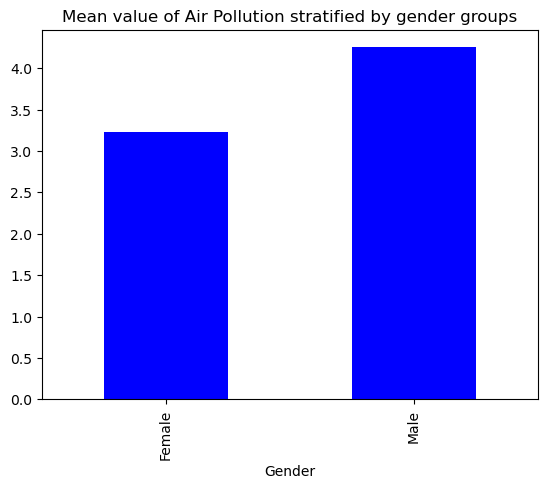

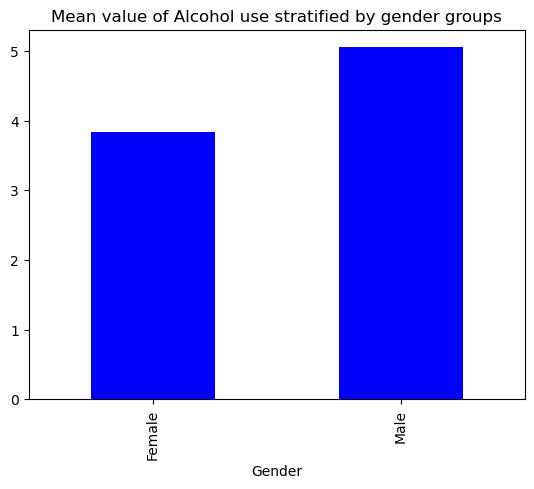

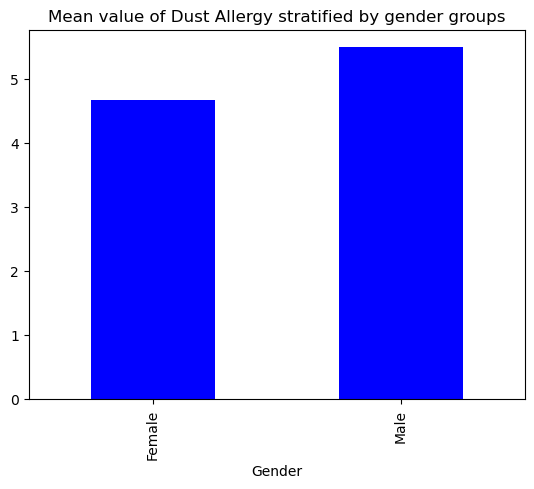

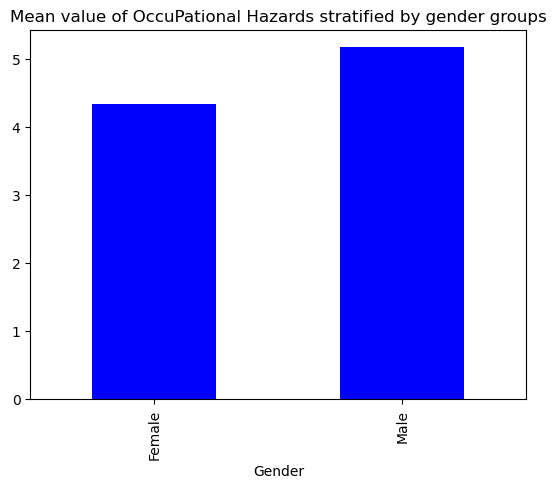

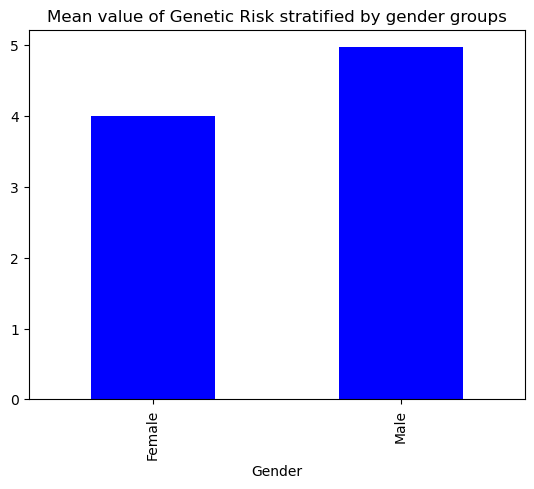

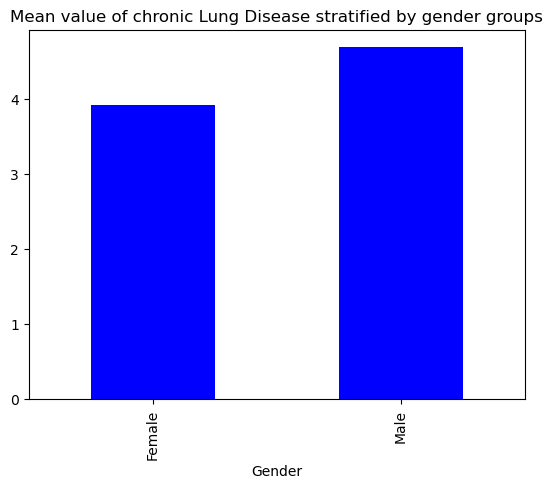

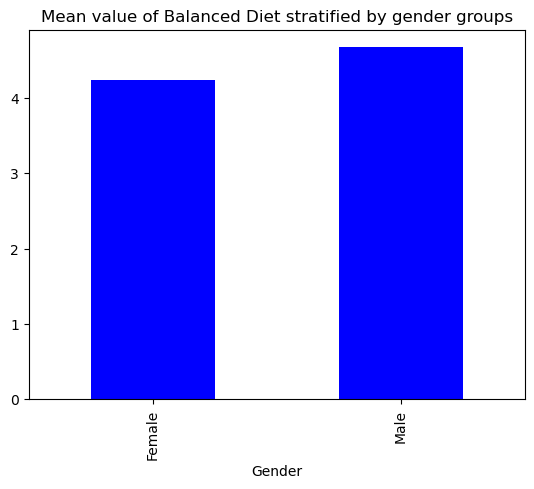

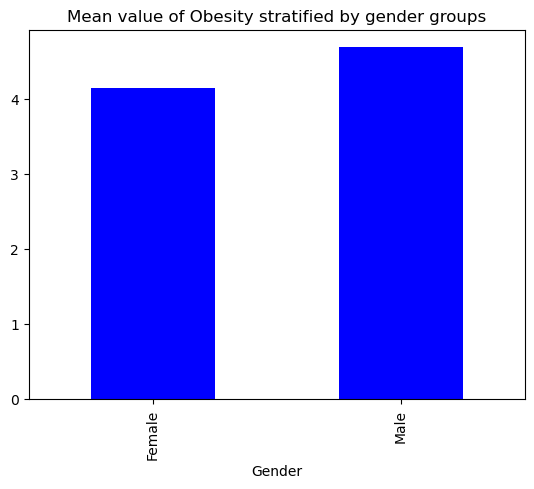

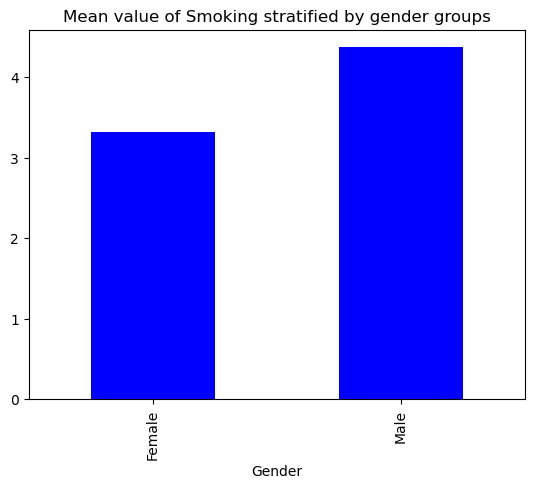

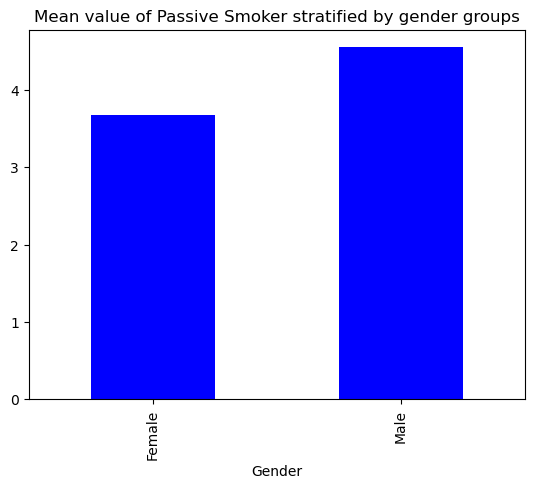

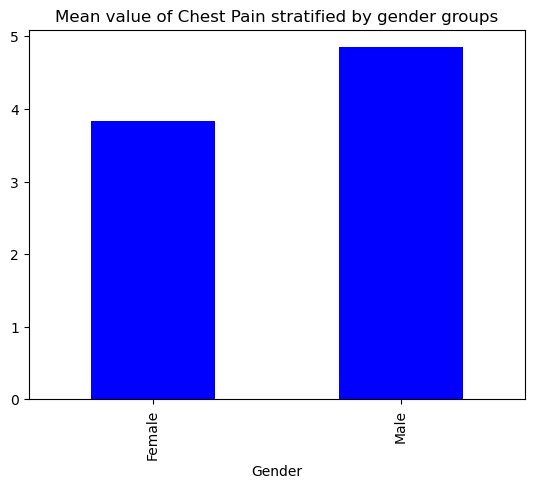

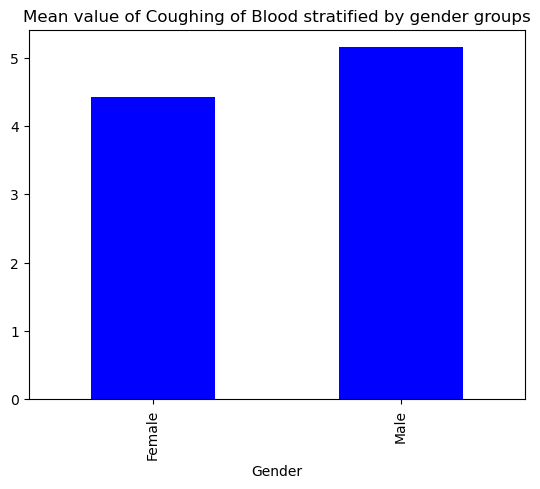

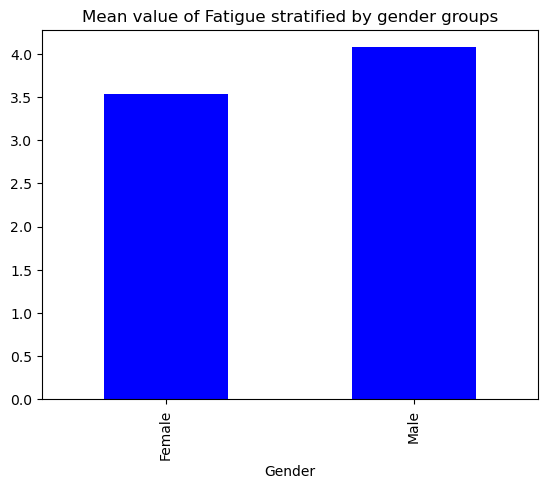

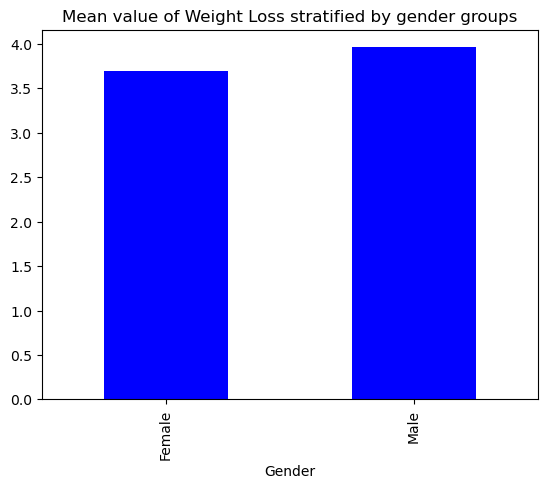

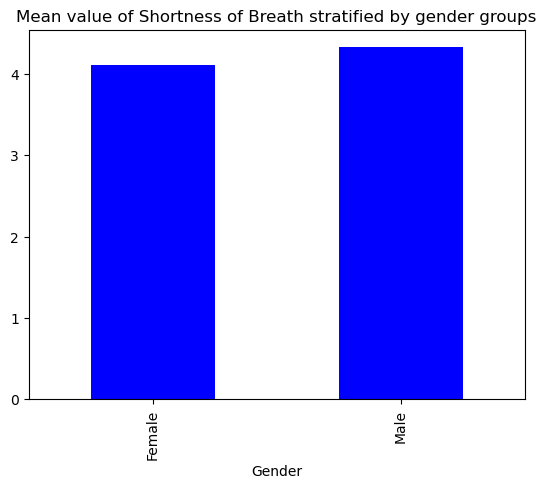

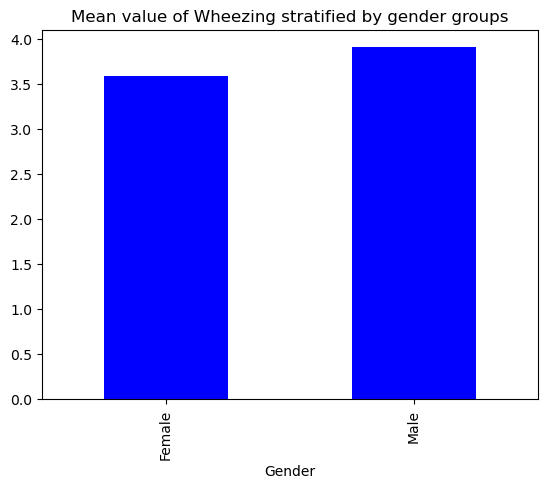

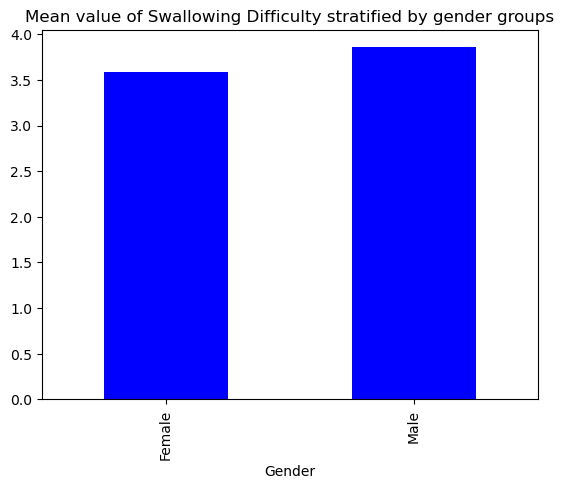

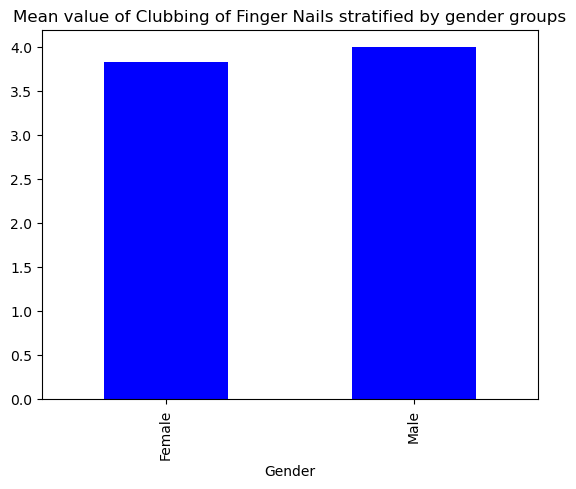

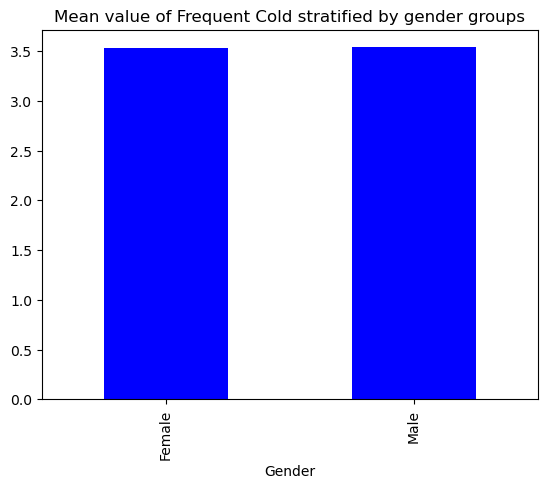

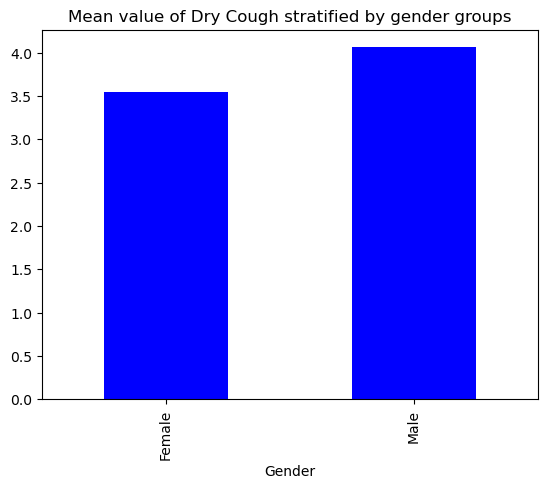

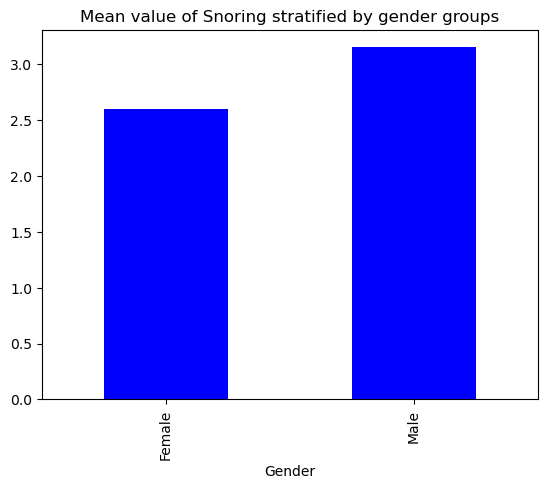

In [24]:
for x in Strat_df2.columns:
    Strat_df2[x].plot(kind= "bar", color = "b")
    plt.title(f'Mean value of {x} stratified by gender groups')
    plt.show()

In [25]:
# t-test to understand statistical significance of gender differences in smoking
# Results are highly statistically significant
gender_1 = working_df[working_df['Gender'] == "Male"]["Smoking"]
gender_2 = working_df[working_df['Gender'] == "Female"]["Smoking"]
stats.ttest_ind(gender_1, gender_2, equal_var=False)

TtestResult(statistic=6.8528617466097, pvalue=1.3163723834361634e-11, df=929.9967797488297)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,age_groups,age_groups2
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,Male,2,4,5,4,3,2,2,...,2,2,3,1,2,3,4,Low,30-39,<36
1,P10,17,Male,3,1,5,3,4,2,2,...,7,8,6,2,1,7,2,Medium,<20,<36
2,P100,35,Male,4,5,6,5,5,4,6,...,9,2,1,4,6,7,2,High,30-39,<36
3,P1000,37,Male,7,7,7,7,6,7,7,...,3,1,4,5,6,7,5,High,30-39,= or >36
4,P101,46,Male,6,8,7,7,7,6,7,...,4,1,4,2,4,2,3,High,40-49,= or >36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,6,7,...,2,7,8,2,4,5,3,High,40-49,= or >36
996,P996,37,Female,6,8,7,7,7,6,7,...,5,7,2,4,3,1,4,High,30-39,= or >36
997,P997,25,Female,4,5,6,5,5,4,6,...,9,2,1,4,6,7,2,High,20-29,<36
